In [ ]:
!pip install pycaret

     |████████████████████████████████| 264 kB 4.0 MB/s 
     |████████████████████████████████| 271 kB 27.0 MB/s 
     |████████████████████████████████| 105 kB 49.4 MB/s 
     |████████████████████████████████| 1.3 MB 44.8 MB/s 
     |████████████████████████████████| 6.8 MB 18.8 MB/s 
     |████████████████████████████████| 167 kB 53.1 MB/s 
     |████████████████████████████████| 80 kB 9.2 MB/s 
     |████████████████████████████████| 248 kB 46.1 MB/s 
     |████████████████████████████████| 1.7 MB 45.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 56 kB 4.0 MB/s 
     |████████████████████████████████| 2.0 MB 53.4 MB/s 
     |████████████████████████████████| 14.4 MB 63 kB/s 
     |████████████████████████████████| 10.1 MB 36.2 MB/s 
     |████████████████████████████████| 3.1 MB 42.9 MB/s 
     |██████████████████

In [ ]:
import pycaret
import pandas as pd

In [ ]:
df = pd.read_csv("Amazon_tv.csv")

In [ ]:
df.head()

,Title,size,supported internet service,Price,Brand,connector,resolution
0,Samsung 138 cm (55 inches) Crystal 4K Pro Seri...,55 Inches HDR10+,"Netflix, Amazon Prime, Zee5, Youtube, Hotstar","₹56,990.00",Samsung,"USB, Built-in Wi-fi, Ethernet, HDMI",4K
1,TCL 164 cm (65 inches) 4K Ultra HD Certified A...,65 Inches A+,"Netflix, Android TV, YouTube","₹58,990.00",TCL,Wi-Fi,4K
2,Mi 80 cm (32 inches) HD Ready Android Smart LE...,32 Inches LED,"Netflix, Amazon Prime, Disney+Hotstar, PlaySto...","₹15,999.00",MI,"USB, Built-in Wi-fi, Hdmi",720p
3,Mi 108 cm (43 Inches) 4K Ultra HD Android Smar...,43 Inches HDR 10,"Netflix, Prime Video, Youtube, Disney+ Hotstar","₹28,999.00",MI,"USB, Built-in Wi-fi, Ethernet, HDMI",4K
4,LG 80 cm (32 inches) HD Ready Smart LED TV 32L...,32 Inches LED,"Netflix, Prime Video, Zee5, Eros Now, Voot, Al...","₹17,999.00",LG,Wi-Fi,720p


In [ ]:
df.Title

0      Samsung 138 cm (55 inches) Crystal 4K Pro Seri...
1      TCL 164 cm (65 inches) 4K Ultra HD Certified A...
2      Mi 80 cm (32 inches) HD Ready Android Smart LE...
3      Mi 108 cm (43 Inches) 4K Ultra HD Android Smar...
4      LG 80 cm (32 inches) HD Ready Smart LED TV 32L...
                             ...                        
164    LG 139.7 cm (55 inches) 4K Ultra HD Smart OLED...
165    Hisense 108 cm (43 inches) 4K Ultra HD Smart C...
166    TCL 164 cm (65 inches) 4K Ultra HD Certified A...
167    Samsung 125 cm (50 inches) Crystal 4K Series U...
168    TCL 126 cm (50 inches) AI 4K Ultra HD Certifie...
Name: Title, Length: 169, dtype: object

In [ ]:
df["size"].unique()

array(['55 Inches HDR10+', '65 Inches A+', '32 Inches LED',
       '43 Inches HDR 10', '43 Inches LED', '50 Inches HDR10+ | HLG',
       '40 Inches A+', '55 Inches Self-LIT Pixel', '55 Inches A+',
       '43 Inches IPS', '32 Inches Bezel-less Design', '50 Inches LED',
       '40 Inches LED', '32 Inches', '43 Inches A+', '55 Inches LED',
       '55 Inches HDR10+ | HLG', '55 Inches A+ Grade',
       '55 Inches HDR10+ | HDR10 | HLG', '50 Inches HDR10+',
       '50 Inches HDR10+ | HDR10 | HLG', '65 Inches HDR10+ | HDR10 | HLG',
       '55 Inches Slim Design', '65 Inches HDR10+ | HLG',
       '31.5 Inches A+', '32 Inches A+', '42.5 Inches A+',
       '65 Inches IPS', '43 Inches Slim Design', '60 Hz',
       '55 Inches Quantum HDR + HDR 10+', '43 Inches OLED',
       '50 Inches A+', '65 Inches LED', '65 Inches Self-LIT Pixel'],
      dtype=object)

In [ ]:
def extract_inches(text):
  
  return(float(text.split()[0]))

In [ ]:
extract_inches('55 Inches HDR10+')

55.0

In [ ]:
df["size_inch"] = df["size"].apply(extract_inches)

In [ ]:
df.head()

,Title,size,supported internet service,Price,Brand,connector,resolution,size_inch
0,Samsung 138 cm (55 inches) Crystal 4K Pro Seri...,55 Inches HDR10+,"Netflix, Amazon Prime, Zee5, Youtube, Hotstar","₹56,990.00",Samsung,"USB, Built-in Wi-fi, Ethernet, HDMI",4K,55.0
1,TCL 164 cm (65 inches) 4K Ultra HD Certified A...,65 Inches A+,"Netflix, Android TV, YouTube","₹58,990.00",TCL,Wi-Fi,4K,65.0
2,Mi 80 cm (32 inches) HD Ready Android Smart LE...,32 Inches LED,"Netflix, Amazon Prime, Disney+Hotstar, PlaySto...","₹15,999.00",MI,"USB, Built-in Wi-fi, Hdmi",720p,32.0
3,Mi 108 cm (43 Inches) 4K Ultra HD Android Smar...,43 Inches HDR 10,"Netflix, Prime Video, Youtube, Disney+ Hotstar","₹28,999.00",MI,"USB, Built-in Wi-fi, Ethernet, HDMI",4K,43.0
4,LG 80 cm (32 inches) HD Ready Smart LED TV 32L...,32 Inches LED,"Netflix, Prime Video, Zee5, Eros Now, Voot, Al...","₹17,999.00",LG,Wi-Fi,720p,32.0


In [ ]:
def clean_price(text):
  return(float("".join(text.split(","))[1:]))

In [ ]:
clean_price("₹17,999.00")

17999.0

In [ ]:
df["Price"] = df["Price"].apply(clean_price)

In [ ]:
float("".join("₹56,990.00".split(","))[1:])

56990.0

In [ ]:
df.head()

,Title,size,supported internet service,Price,Brand,connector,resolution,size_inch
0,Samsung 138 cm (55 inches) Crystal 4K Pro Seri...,55 Inches HDR10+,"Netflix, Amazon Prime, Zee5, Youtube, Hotstar",56990.0,Samsung,"USB, Built-in Wi-fi, Ethernet, HDMI",4K,55.0
1,TCL 164 cm (65 inches) 4K Ultra HD Certified A...,65 Inches A+,"Netflix, Android TV, YouTube",58990.0,TCL,Wi-Fi,4K,65.0
2,Mi 80 cm (32 inches) HD Ready Android Smart LE...,32 Inches LED,"Netflix, Amazon Prime, Disney+Hotstar, PlaySto...",15999.0,MI,"USB, Built-in Wi-fi, Hdmi",720p,32.0
3,Mi 108 cm (43 Inches) 4K Ultra HD Android Smar...,43 Inches HDR 10,"Netflix, Prime Video, Youtube, Disney+ Hotstar",28999.0,MI,"USB, Built-in Wi-fi, Ethernet, HDMI",4K,43.0
4,LG 80 cm (32 inches) HD Ready Smart LED TV 32L...,32 Inches LED,"Netflix, Prime Video, Zee5, Eros Now, Voot, Al...",17999.0,LG,Wi-Fi,720p,32.0


In [ ]:
def connectors(text):
  cn = text.split(",")
  return(len(cn))

In [ ]:
connectors("USB, Built-in Wi-fi, Hdmi	")

3

In [ ]:
df["connector"] = df["connector"].apply(connectors)

In [ ]:
df.head()

,Title,size,supported internet service,Price,Brand,connector,resolution,size_inch
0,Samsung 138 cm (55 inches) Crystal 4K Pro Seri...,55 Inches HDR10+,"Netflix, Amazon Prime, Zee5, Youtube, Hotstar",56990.0,Samsung,4,4K,55.0
1,TCL 164 cm (65 inches) 4K Ultra HD Certified A...,65 Inches A+,"Netflix, Android TV, YouTube",58990.0,TCL,1,4K,65.0
2,Mi 80 cm (32 inches) HD Ready Android Smart LE...,32 Inches LED,"Netflix, Amazon Prime, Disney+Hotstar, PlaySto...",15999.0,MI,3,720p,32.0
3,Mi 108 cm (43 Inches) 4K Ultra HD Android Smar...,43 Inches HDR 10,"Netflix, Prime Video, Youtube, Disney+ Hotstar",28999.0,MI,4,4K,43.0
4,LG 80 cm (32 inches) HD Ready Smart LED TV 32L...,32 Inches LED,"Netflix, Prime Video, Zee5, Eros Now, Voot, Al...",17999.0,LG,1,720p,32.0


In [ ]:
df["supported internet service"] = df["supported internet service"].apply(connectors)

In [ ]:
df.head()

,Title,size,supported internet service,Price,Brand,connector,resolution,size_inch
0,Samsung 138 cm (55 inches) Crystal 4K Pro Seri...,55 Inches HDR10+,5,56990.0,Samsung,4,4K,55.0
1,TCL 164 cm (65 inches) 4K Ultra HD Certified A...,65 Inches A+,3,58990.0,TCL,1,4K,65.0
2,Mi 80 cm (32 inches) HD Ready Android Smart LE...,32 Inches LED,5,15999.0,MI,3,720p,32.0
3,Mi 108 cm (43 Inches) 4K Ultra HD Android Smar...,43 Inches HDR 10,4,28999.0,MI,4,4K,43.0
4,LG 80 cm (32 inches) HD Ready Smart LED TV 32L...,32 Inches LED,9,17999.0,LG,1,720p,32.0


In [ ]:
def caracters(text):
  return(text.split("Inches")[-1])

In [ ]:
df["caracteristiques"] = df["size"].apply(caracters)

In [ ]:
df.head()

,Title,size,supported internet service,Price,Brand,connector,resolution,size_inch,caracteristiques
0,Samsung 138 cm (55 inches) Crystal 4K Pro Seri...,55 Inches HDR10+,5,56990.0,Samsung,4,4K,55.0,HDR10+
1,TCL 164 cm (65 inches) 4K Ultra HD Certified A...,65 Inches A+,3,58990.0,TCL,1,4K,65.0,A+
2,Mi 80 cm (32 inches) HD Ready Android Smart LE...,32 Inches LED,5,15999.0,MI,3,720p,32.0,LED
3,Mi 108 cm (43 Inches) 4K Ultra HD Android Smar...,43 Inches HDR 10,4,28999.0,MI,4,4K,43.0,HDR 10
4,LG 80 cm (32 inches) HD Ready Smart LED TV 32L...,32 Inches LED,9,17999.0,LG,1,720p,32.0,LED


In [ ]:
df.drop(["Title","size"],axis=1,inplace=True)

In [ ]:
df.head()

,supported internet service,Price,Brand,connector,resolution,size_inch,caracteristiques
0,5,56990.0,Samsung,4,4K,55.0,HDR10+
1,3,58990.0,TCL,1,4K,65.0,A+
2,5,15999.0,MI,3,720p,32.0,LED
3,4,28999.0,MI,4,4K,43.0,HDR 10
4,9,17999.0,LG,1,720p,32.0,LED


In [ ]:
df.Brand

0      Samsung
1          TCL
2           MI
3           MI
4           LG
        ...   
164         LG
165    Hisense
166        TCL
167    Samsung
168        TCL
Name: Brand, Length: 169, dtype: object

In [ ]:
df.caracteristiques.unique()

array([' HDR10+', ' A+', ' LED', ' HDR 10', ' HDR10+ | HLG',
       ' Self-LIT Pixel', ' IPS', ' Bezel-less Design', '', ' A+ Grade',
       ' HDR10+ | HDR10 | HLG', ' Slim Design', '60 Hz',
       ' Quantum HDR + HDR 10+', ' OLED'], dtype=object)

In [ ]:
df.Brand.unique()

array(['Samsung', 'TCL', 'MI', 'LG', 'OnePlus', 'Redmi', 'VU',
       'AmazonBasics', 'EAirtec', 'Sony', 'IFFALCON', 'Hisense', 'Onida',
       'Kodak',
       'Game mode, Smart Monitor, Flicker-Free, HDMI,Bluetooth, wifi connectivity',
       'Sanyo', 'AKAI', 'TOSHIBA', 'ADSUN', 'Kevin', 'Shinco', '4K'],
      dtype=object)

In [ ]:
df.resolution.unique()

array(['4K', '720p', '1080p', 'HD Ready', '2', '60 Hz'], dtype=object)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
oe = OrdinalEncoder()

In [ ]:
df[["Brand","resolution","caracteristiques"]] = oe.fit_transform(df[["Brand","resolution","caracteristiques"]])

In [ ]:
oe.transform([["Samsung","4K"," A+"]])

array([[15.,  2.,  1.]])

In [ ]:
import joblib
joblib.dump(oe,"oe.pkl")

['oe.pkl']

In [ ]:
o = joblib.load("oe.pkl")

In [ ]:
o.transform([["Samsung","4K"," A+"]])

array([[15.,  2.,  1.]])

In [ ]:
df.head()

,supported internet service,Price,Brand,connector,resolution,size_inch,caracteristiques
0,5,56990.0,15.0,4,2.0,55.0,5.0
1,3,58990.0,19.0,1,2.0,65.0,1.0
2,5,15999.0,11.0,3,4.0,32.0,9.0
3,4,28999.0,11.0,4,2.0,43.0,4.0
4,9,17999.0,10.0,1,4.0,32.0,9.0


In [ ]:
from pycaret.regression import *

In [ ]:
model = setup(df,target='Price',fold=5,normalize=True,feature_selection=True,train_size=0.7)

,Description,Value
0,session_id,7204
1,Target,Price
2,Original Data,"(169, 7)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(118, 18)"


In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2887.9549,5.662055e+07,6276.0149,0.9396,0.1079,0.0624,0.048
dt,Decision Tree Regressor,3388.3281,9.073518e+07,8277.3703,0.8854,0.1587,0.0729,0.020
et,Extra Trees Regressor,3861.1518,1.005485e+08,8760.1641,0.8776,0.1588,0.0895,0.424
rf,Random Forest Regressor,4569.3339,1.195978e+08,10009.7343,0.8417,0.2076,0.1262,0.472
ada,AdaBoost Regressor,6138.1859,1.488261e+08,10984.1344,0.8012,0.2197,0.1750,0.078
lightgbm,Light Gradient Boosting Machine,6910.8667,2.027940e+08,12716.6937,0.7389,0.2543,0.1798,0.114
ridge,Ridge Regression,8690.2438,1.932497e+08,13172.4320,0.7055,0.4803,0.2766,0.016
br,Bayesian Ridge,8784.6491,1.953142e+08,13319.8499,0.6954,0.4295,0.2884,0.016
llar,Lasso Least Angle Regression,9181.5160,2.147907e+08,14181.2544,0.6396,0.4474,0.3186,0.018
lasso,Lasso Regression,9188.6937,2.150041e+08,14189.6479,0.6388,0.4441,0.3191,0.020


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=7682, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
rf = create_model("rf")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4713.2969,8.853183e+07,9409.1352,0.7755,0.2811,0.1990
1,1668.3567,7.264061e+06,2695.1922,0.9640,0.0834,0.0528
2,5267.3639,1.474238e+08,12141.8196,0.7882,0.2786,0.1562
3,4456.6433,9.203286e+07,9593.3757,0.8587,0.1975,0.0880
4,6741.0086,2.627365e+08,16209.1488,0.8221,0.1975,0.1350
Mean,4569.3339,1.195978e+08,10009.7343,0.8417,0.2076,0.1262
SD,1652.4231,8.438811e+07,4404.8866,0.0676,0.0722,0.0512


In [ ]:
tune_model(rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2763.7381,4.094613e+07,6398.9165,0.8962,0.1544,0.0867
1,1291.6875,1.161841e+07,3408.5784,0.9424,0.0796,0.0340
2,3918.3080,7.822173e+07,8844.3050,0.8876,0.1758,0.0783
3,5963.7589,1.821772e+08,13497.3021,0.7203,0.2567,0.1020
4,6164.6348,2.188989e+08,14795.2326,0.8518,0.1896,0.1184
Mean,4020.4254,1.063725e+08,9388.8669,0.8597,0.1712,0.0839
SD,1866.0054,8.057289e+07,4268.6820,0.0754,0.0572,0.0284


RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mae',
                      max_depth=8, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.2,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=110, n_jobs=-1, oob_score=False,
                      random_state=7682, verbose=0, warm_start=False)

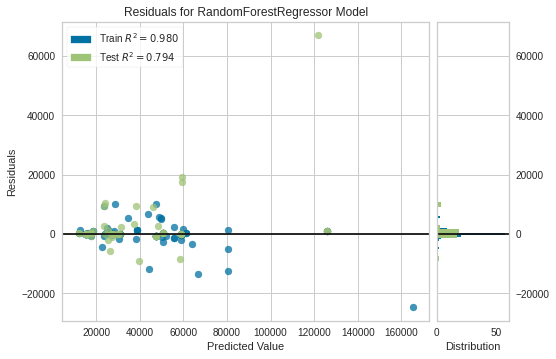

In [ ]:
plot_model(rf)

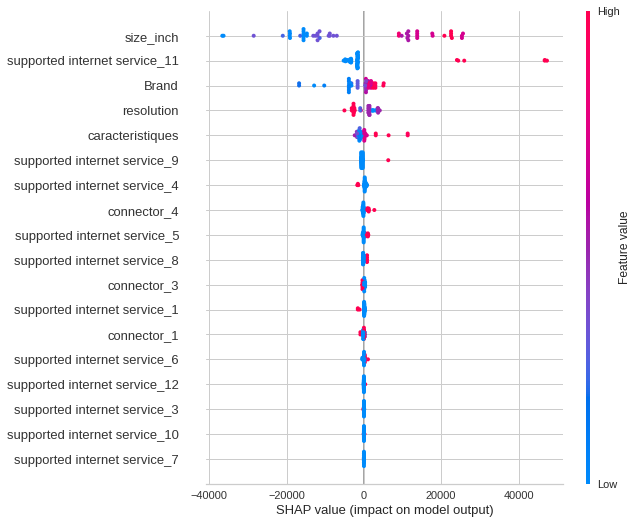

In [ ]:
interpret_model(rf)

In [ ]:
df.Price

0       56990.0
1       58990.0
2       15999.0
3       28999.0
4       17999.0
         ...   
164    124990.0
165     30990.0
166     58990.0
167     49990.0
168     37490.0
Name: Price, Length: 169, dtype: float64

In [ ]:
save_model(rf,"rf")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                        criterion='mse', max_depth=None,
                                        max_features='auto', max_leaf_nodes=None,
                                        max_samples=None,
                             

In [ ]:
model = load_model("rf")

Transformation Pipeline and Model Successfully Loaded


In [ ]:
predict_model(rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,3743.8609,1.128717e+08,10624.1097,0.7945,0.1863,0.1074


,size_inch,supported internet service_10,resolution,connector_3,connector_4,caracteristiques,supported internet service_3,supported internet service_1,supported internet service_11,supported internet service_5,supported internet service_12,supported internet service_8,supported internet service_6,supported internet service_7,connector_1,supported internet service_9,Brand,supported internet service_4,Price,Label
0,-1.367447,0.0,1.391499,1.0,0.0,-1.341733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.416778,1.0,11600.0,11954.920000
1,-1.367447,0.0,1.391499,0.0,0.0,0.714429,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.095587,0.0,14999.0,14999.000000
2,0.388573,0.0,-0.187317,0.0,0.0,0.714429,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.095587,0.0,33999.0,37406.682381
3,-1.367447,0.0,1.391499,1.0,0.0,-1.341733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.416778,1.0,11600.0,11954.920000
4,-1.367447,0.0,1.391499,1.0,0.0,0.714429,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.152748,0.0,14299.0,23645.480000
5,-0.586994,0.0,-1.766133,1.0,0.0,-1.341733,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.256182,0.0,23999.0,23974.920000
6,-0.294324,0.0,-0.187317,0.0,0.0,-1.341733,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.992153,0.0,29999.0,30136.030000
7,-1.367447,0.0,1.391499,0.0,0.0,0.714429,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.095587,0.0,14999.0,14999.000000
8,0.876357,0.0,-0.187317,1.0,0.0,-1.084713,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.453206,0.0,47999.0,47260.967033
9,0.876357,0.0,-0.187317,1.0,0.0,-1.084713,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.453206,0.0,47999.0,47260.967033


In [ ]:
df_test = df.iloc[160:,:]

In [ ]:
df_test.drop(["Price"],inplace=True,axis=1)

In [ ]:
predict_model(rf,df_test)

,supported internet service,Brand,connector,resolution,size_inch,caracteristiques,Label
160,4,19.0,1,2.0,50.0,1.0,38786.450000
161,6,3.0,1,4.0,32.0,9.0,14999.000000
162,8,7.0,3,2.0,55.0,2.0,47260.967033
163,12,2.0,3,0.0,40.0,1.0,23974.920000
164,11,10.0,4,2.0,55.0,12.0,125970.180000
165,5,6.0,1,2.0,43.0,1.0,30990.000000
166,3,19.0,1,2.0,65.0,1.0,59070.720000
167,5,15.0,4,2.0,50.0,5.0,50369.958874
168,4,19.0,1,2.0,50.0,1.0,38786.450000
